In [2]:
# Run 'source ~/.profile'
import satpy
from satpy import Scene
import sys
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

from global_land_mask import globe

import glob

sys.path.insert(0,'/home/cameron/Projects/')

In [43]:
#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-03_0941Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-03_0941Z-l1a.nc'
#cloud_mask_quantile = 0.075

#points_file = '/home/cameron/Dokumenter/Data/frohavetnorth/frohavetnorth_2024-04-08_0928Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavetnorth/frohavetnorth_2024-04-08_0928Z-l1a.nc'
#cloud_mask_quantile = 0.075

#points_file = '/home/cameron/Dokumenter/Data/frohavetnorth/frohavetnorth_2024-04-08_1102Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavetnorth/frohavetnorth_2024-04-08_1102Z-l1a.nc'
#cloud_mask_quantile = 0.075

#points_file = '/home/cameron/Dokumenter/Data/frohavetwest/frohavetwest_2024-04-09_1041Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavetwest/frohavetwest_2024-04-09_1041Z-l1a.nc'
#cloud_mask_quantile = 0.075*4

#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-15_1006Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-15_1006Z-l1a.nc'
#cloud_mask_quantile = 0.075*5

#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-16_0945Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-16_0945Z-l1a.nc'
#cloud_mask_quantile = 0.075*5

#points_file = '/home/cameron/Dokumenter/Data/frohavetnorth/frohavetnorth_2024-04-17_0923Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavetnorth/frohavetnorth_2024-04-17_0923Z-l1a.nc'
#cloud_mask_quantile = 0.075*5

#points_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-04-16_1118Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-04-16_1118Z-l1a.nc'
#cloud_mask_quantile = 0.075*5

#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-18_1035Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-18_1035Z-l1a.nc'
#cloud_mask_quantile = 0.075*5

#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-19_1014Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-19_1014Z-l1a.nc'
#cloud_mask_quantile = 0.075*7

#points_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-04-20_0952Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-04-20_0952Z-l1a.nc'
#cloud_mask_quantile = 0.85

#points_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-04-21_0930Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-04-21_0930Z-l1a.nc'
#cloud_mask_quantile = 0.8


points_file = '/home/cameron/Dokumenter/Data/ingdalen/ingdalen_2024-04-26_0915Z-bin3.points'
nc_file = '/home/cameron/Dokumenter/Data/ingdalen/ingdalen_2024-04-26_0915Z-l1a.nc'
cloud_mask_quantile = 0.5 #Original: 0.5
sentinel_3_dir = '/home/cameron/Dokumenter/Frohavet_Sentinel_3/S3B_OL_2_WRR____20240426T093209_20240426T101628_20240427T120354_2659_092_193______MAR_O_NT_003.SEN3'



#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-26_1049Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-04-26_1049Z-l1a.nc'
#cloud_mask_quantile = 0.5

#points_file = '/home/cameron/Dokumenter/Data/frohavetsouth/frohavetsouth_2024-04-21_1104Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavetsouth/frohavetsouth_2024-04-21_1104Z-l1a.nc'
#cloud_mask_quantile = 0.75

#points_file = '/home/cameron/Dokumenter/Data/ingdalen/ingdalen_2024-05-04_1101Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/ingdalen/ingdalen_2024-05-04_1101Z-l1a.nc'
#cloud_mask_quantile = 0.75

#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-05-06_1017Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-05-06_1017Z-l1a.nc'
#cloud_mask_quantile = 0.6
#sentinel_3_dir = '/home/cameron/Dokumenter/Frohavet_Sentinel_3/S3B_OL_2_WFR____20240506T102040_20240506T102340_20240506T122602_0179_092_336_1800_MAR_O_NR_003.SEN3'

#points_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-05-05_1039Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/roervik/roervik_2024-05-05_1039Z-l1a.nc'
#cloud_mask_quantile = 0.85
#sentinel_3_dir = '/home/cameron/Dokumenter/Frohavet_Sentinel_3/S3B_OL_2_WRR____20240505T103843_20240505T112305_20240506T142550_2662_092_322______MAR_O_NT_003.SEN3'

#points_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-05-13_1049Z-bin3.points'
#nc_file = '/home/cameron/Dokumenter/Data/frohavet/frohavet_2024-05-13_1049Z-l1a.nc'
#cloud_mask_quantile = 0.6

In [4]:

l1a_prefix = nc_file.rsplit('-', maxsplit=1)[0]
l1a_file_prefix = l1a_prefix.split('/')[-1]

files = [points_file, nc_file] # List of files to be read by SatPy

# Create SatPy scene
scene = Scene(filenames=files, reader='hypso1_l1a_nc', reader_kwargs={'flip': True})


(598, 1092, 120)


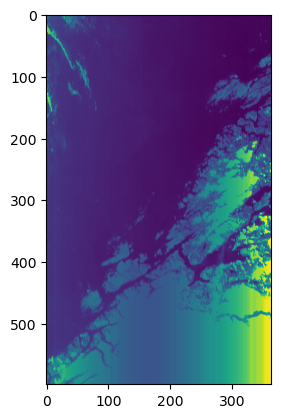

In [5]:
datasets = scene.available_dataset_names()
scene.load(datasets)
ds = scene.to_xarray()

import re

band_names = scene.all_dataset_names()

# Remove latitude and longitude
band_names.remove('latitude')
band_names.remove('longitude')

# Extract numbers and sort
sorted_band_names = sorted(band_names, key=lambda x: int(re.search(r'\d+', x).group()))


ds = ds[sorted_band_names]

#da = ds.to_stacked_array('band', sample_dims=['y','x'])
#da.drop_vars(['latitude', 'longitude'])
#da.to_numpy().shape
da = ds.to_stacked_array('band', sample_dims=['y','x'])

datacube = da.to_numpy()

plt.imshow(datacube[:,::-3,40])
print(datacube.shape)

In [6]:
# Compute wl and choose bands for band ratio
spectral_coeffs = [ -5.719788129534360902e-09,
                    1.324037080791479811e-05, 
                    3.751455956374321055e-01,
                    2.264762366937773663e+02]
x_start = 428
x_stop = 1508
image_width = 120

x = np.linspace(x_start, x_stop, image_width)

h1_wl = spectral_coeffs[3] + spectral_coeffs[2]*x + spectral_coeffs[1]*x*x + spectral_coeffs[0]*x*x*x


a = abs(h1_wl-549)
min_index = np.argmin(a)
band_549nm_name = 'band_' + str(min_index)

a = abs(h1_wl-663)
min_index = np.argmin(a)
band_663nm_name = 'band_' + str(min_index)

scene.load(['latitude', 'longitude', band_549nm_name, band_663nm_name])
#datasets = scene.available_dataset_names()
#scene.load(datasets)

print(band_549nm_name)
print(scene['band_46'].wavelength) # This does not match?

print(band_663nm_name)
print(scene['band_78'].wavelength) # This does not match?

band_46
550 nm (550-550 nm)
band_78
662 nm (662-662 nm)


In [7]:
# Get image dimensions
img_dims = scene['latitude'].shape

# Land mask
land_mask = np.zeros(img_dims, dtype=bool)

lats = scene['latitude'].data
lons = scene['longitude'].data

for x in range(0,img_dims[0]):
    for y in range(0,img_dims[1]):
        lat = lats[x][y]
        lon = lons[x][y]
        land_mask[x][y] = globe.is_land(lat, lon)



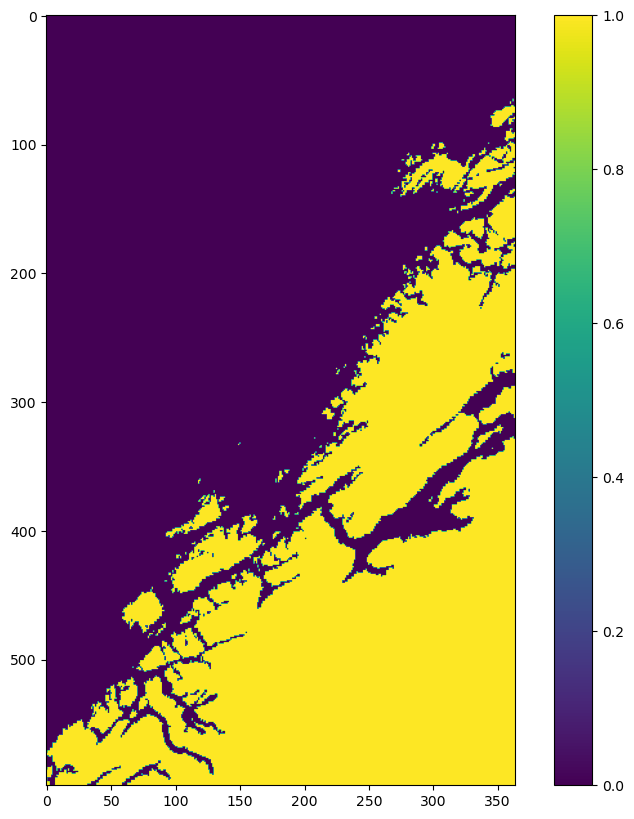

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(land_mask[:,::-3])
plt.colorbar()

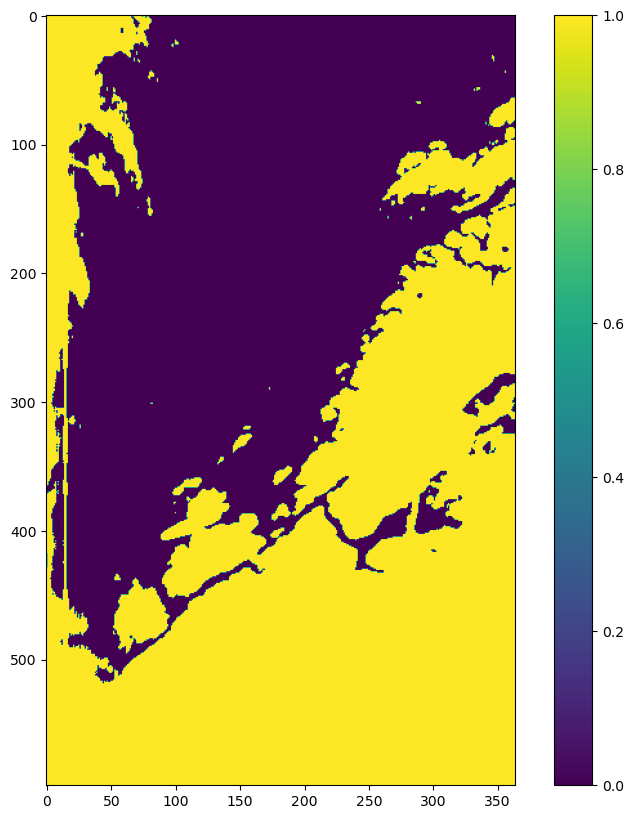

In [44]:
# Cloud mask
#cloud_mask = np.zeros(img_dims, dtype=bool)


cloud_mask = np.sum(datacube, axis=2)**2

#cloud_mask_threshold = 0.075e8
cloud_mask_threshold = np.quantile(cloud_mask, cloud_mask_quantile)

cloud_mask = np.sum(datacube, axis=2)**2 > cloud_mask_threshold

plt.figure(figsize=(10,10))
plt.imshow(cloud_mask[:,::-3])
plt.colorbar()

In [35]:
unified_mask = land_mask | cloud_mask

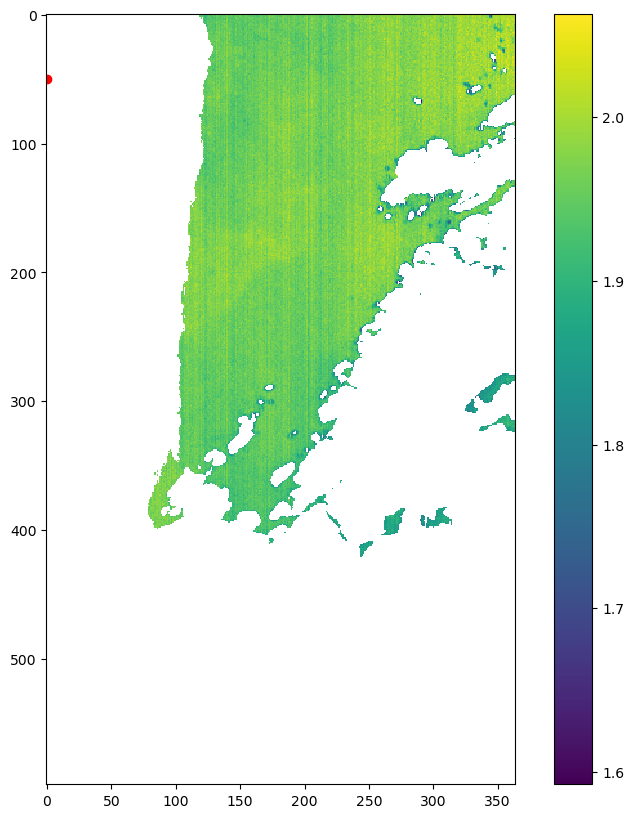

In [36]:
# Chlorophyll estimates
chlor = scene[band_549nm_name] / scene[band_663nm_name]
chlor = chlor.to_numpy()

chlor = np.ma.masked_array(chlor, unified_mask, fill_value=np.nan)

chlor_factor = 0.1

# Only get maximum from unmasked data
chlor = chlor - chlor_factor*chlor.compressed().max()
#chlor = chlor - 0.88*chlor.compressed().max()
chlor[chlor < 0] = 0

chlor = chlor[:,::-1]

plt.figure(figsize=(10,10))
plt.imshow(chlor[:,::3], interpolation='none')
plt.plot(0,50,'ro') 
plt.colorbar()

# Concentration in units mg m-3

In [13]:
coords = scene[band_549nm_name].coords

scene['chlor_a'] = xr.DataArray(chlor, coords=coords)
scene['chlor_a'].attrs['area'] = scene[band_549nm_name].attrs['area']
scene['chlor_a'].attrs['start_time'] = scene[band_549nm_name].attrs['start_time']
scene['chlor_a'].attrs['end_time'] = scene[band_549nm_name].attrs['end_time']
scene['chlor_a'].attrs['modifiers'] = satpy.dataset.dataid.ModifierTuple()
scene['chlor_a'].attrs['chlor_factor'] = chlor_factor
scene['chlor_a'].attrs['algorithm'] = '549nm over 663nm band ratio'
scene['chlor_a'].attrs['ancillary_variables'] = []

scene['land_mask'] = xr.DataArray(land_mask, coords=coords)
scene['land_mask'].attrs['area'] = scene[band_549nm_name].attrs['area']
scene['land_mask'].attrs['start_time'] = scene[band_549nm_name].attrs['start_time']
scene['land_mask'].attrs['end_time'] = scene[band_549nm_name].attrs['end_time']
scene['land_mask'].attrs['modifiers'] = satpy.dataset.dataid.ModifierTuple()
scene['land_mask'].attrs['ancillary_variables'] = []

scene['cloud_mask'] = xr.DataArray(cloud_mask, coords=coords)
scene['cloud_mask'].attrs['area'] = scene[band_549nm_name].attrs['area']
scene['cloud_mask'].attrs['start_time'] = scene[band_549nm_name].attrs['start_time']
scene['cloud_mask'].attrs['end_time'] = scene[band_549nm_name].attrs['end_time']
scene['cloud_mask'].attrs['modifiers'] = satpy.dataset.dataid.ModifierTuple()
scene['cloud_mask'].attrs['cloud_mask_threshold'] = cloud_mask_threshold
scene['cloud_mask'].attrs['ancillary_variables'] = []

scene.save_datasets(writer='cf', 
                    datasets=['chlor_a', 'land_mask', 'cloud_mask'], 
                    filename = './datasets_out/' + l1a_file_prefix+'_band_ratio_chlor_a' + '.nc')

/home/cameron/miniforge3/lib/python3.10/site-packages/satpy/writers/cf_writer.py:274: UserWarning: dtype bool not compatible with CF-1.7.
  grouped_datasets, header_attrs = collect_cf_datasets(list_dataarrays=datasets,  # list of xr.DataArray


[None]

In [14]:
from hypso import Hypso

satobj = Hypso(nc_file)

Processing *wide* Image with Dimensions: (598, 1092)
Radiometric Correction Ongoing
Smile Correction Ongoing
Destriping Correction Ongoing
L1b.nc file already exists. Not creating it.
Getting Projection Data without lat/lon correction =========================================
Points File Was Not Found. No Correction done.


In [15]:
from Py6S import *

atmos_params = {
    'aot550': 0.0580000256
}

# AOT550 parameter gotten from: https://giovanni.gsfc.nasa.gov/giovanni/
# In this case, if you force reload, you would delete L1C so we set it to False

try:
    satobj.create_geotiff(product="L2-6SV1", force_reload=False, atmos_dict=atmos_params)
except FileNotFoundError:
    print('Directory does not exist so continue')


-------  Py6S Atmospheric Correction  ----------
ROI:
Max Lat: 66.12889099121094  Min Lat: 62.548858642578125
Max Lon: 10.99233627319336  Min Lon: 5.366475582122803


100%|██████████| 120/120 [00:32<00:00,  3.66it/s]


Directory does not exist so continue


In [16]:
#satobj.l2a_cube["6SV1"]

In [45]:
#satobj.waterMask = ~land_mask[:,:]
satobj.waterMask = ~unified_mask
#satobj.waterMask = np.ones(img_dims, dtype=bool)

In [46]:
from hypso.experimental.chlorophyll import start_chl_estimation

start_chl_estimation(sat_obj=satobj, model_path="/home/cameron/Dokumenter/Chlorophyll_NN_Models/model_6sv1_aqua_tuned.joblib")

satobj.chl = satobj.chl[:,::-1]


# results: Chlorophyll Concentration [mg m^-3]

/home/cameron/miniforge3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


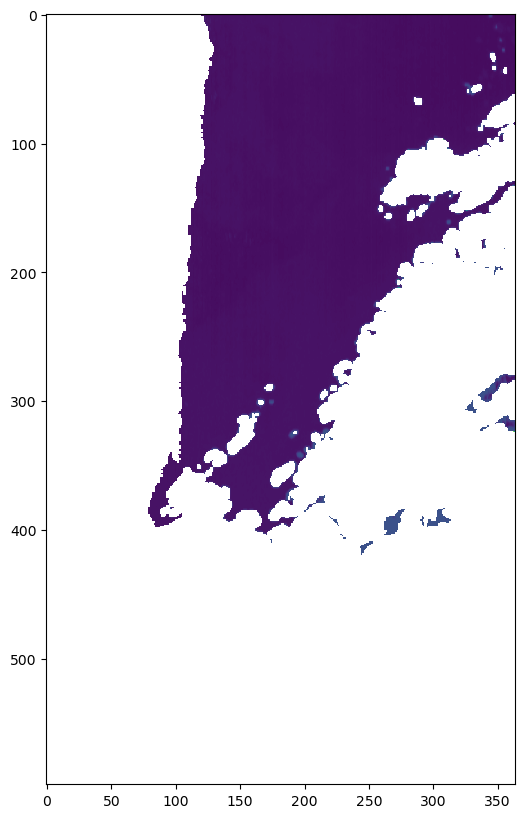

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(satobj.chl[:,::3])

In [48]:
satobj.chl[200,600]

0.38709400400468347

In [40]:
coords = scene[band_549nm_name].coords

scene['chlor_a'] = xr.DataArray(chlor, coords=coords)
scene['chlor_a'].attrs['area'] = scene[band_549nm_name].attrs['area']
scene['chlor_a'].attrs['start_time'] = scene[band_549nm_name].attrs['start_time']
scene['chlor_a'].attrs['end_time'] = scene[band_549nm_name].attrs['end_time']
scene['chlor_a'].attrs['modifiers'] = satpy.dataset.dataid.ModifierTuple()
scene['chlor_a'].attrs['chlor_factor'] = chlor_factor
scene['chlor_a'].attrs['algorithm'] = 'model_6sv1_aqua_tuned'
scene['chlor_a'].attrs['ancillary_variables'] = []

scene['land_mask'] = xr.DataArray(land_mask, coords=coords)
scene['land_mask'].attrs['area'] = scene[band_549nm_name].attrs['area']
scene['land_mask'].attrs['start_time'] = scene[band_549nm_name].attrs['start_time']
scene['land_mask'].attrs['end_time'] = scene[band_549nm_name].attrs['end_time']
scene['land_mask'].attrs['modifiers'] = satpy.dataset.dataid.ModifierTuple()
scene['land_mask'].attrs['ancillary_variables'] = []

scene['cloud_mask'] = xr.DataArray(cloud_mask, coords=coords)
scene['cloud_mask'].attrs['area'] = scene[band_549nm_name].attrs['area']
scene['cloud_mask'].attrs['start_time'] = scene[band_549nm_name].attrs['start_time']
scene['cloud_mask'].attrs['end_time'] = scene[band_549nm_name].attrs['end_time']
scene['cloud_mask'].attrs['modifiers'] = satpy.dataset.dataid.ModifierTuple()
scene['cloud_mask'].attrs['cloud_mask_threshold'] = cloud_mask_threshold
scene['cloud_mask'].attrs['ancillary_variables'] = []

scene.save_datasets(writer='cf', 
                    datasets=['chlor_a', 'land_mask', 'cloud_mask'], 
                    filename = './datasets_out/' + l1a_file_prefix+'_model_6sv1_aqua_tuned_chlor_a' + '.nc')

/home/cameron/miniforge3/lib/python3.10/site-packages/satpy/writers/cf_writer.py:274: UserWarning: dtype bool not compatible with CF-1.7.
  grouped_datasets, header_attrs = collect_cf_datasets(list_dataarrays=datasets,  # list of xr.DataArray


[None]

In [128]:
print('NN model min/max:')
print(np.nanmax(satobj.chl))
print(np.nanmin(satobj.chl))
print('')

print('Band ratio min/max:')
print(np.nanmax(chlor))
print(np.nanmin(chlor))



NN model min/max:
15.230451490186187
0.20291369915289081

Band ratio min/max:
2.065299
1.3732874


In [129]:
vmax = max([np.nanmax(satobj.chl), np.nanmax(chlor)])
vmin = min([np.nanmin(satobj.chl), np.nanmin(chlor)])


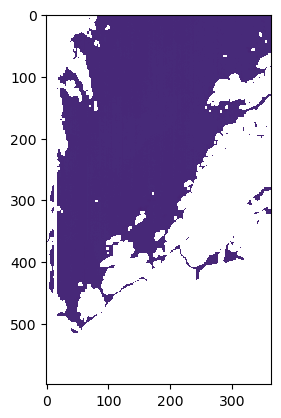

In [130]:
plt.imshow(chlor[:,::3], vmax=vmax, vmin=vmin)

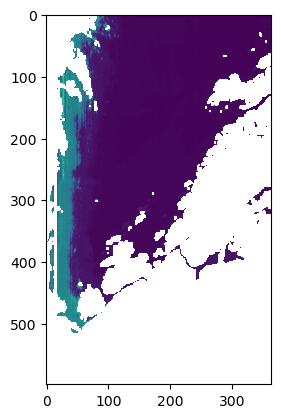

In [131]:
plt.imshow(satobj.chl[:,::3], vmax=vmax, vmin=vmin)

In [132]:


filenames = []
filenames = filenames + glob.glob(sentinel_3_dir + '/geo_coordinates.nc')
filenames = filenames + glob.glob(sentinel_3_dir + '/chl_nn.nc')
filenames = filenames + glob.glob(sentinel_3_dir + '/tsm_nn.nc')

sentinel_3_scene = Scene(filenames=filenames, reader='olci_l2')

sentinel_3_scene.load(['chl_nn', 'tsm_nn', 'latitude', 'longitude'])

/home/cameron/miniforge3/lib/python3.10/site-packages/xarray/core/dataset.py:282: UserWarning: The specified chunks separate the stored chunks along dimension "rows" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [133]:
area_def = scene[band_549nm_name].attrs['area']

In [134]:
from pyresample import image
from pyresample import geometry

chl = sentinel_3_scene['chl_nn'].to_numpy()
tsm = sentinel_3_scene['tsm_nn'].to_numpy()
lats = sentinel_3_scene['latitude'].to_numpy()
lons = sentinel_3_scene['longitude'].to_numpy()

grid_lons, grid_lats = area_def.get_lonlats()



swath_def = geometry.SwathDefinition(lons=lons, lats=lats)
swath_con = image.ImageContainerNearest(chl, swath_def, radius_of_influence=5000)
area_con = swath_con.resample(area_def)
chl_result = area_con.image_data

swath_def = geometry.SwathDefinition(lons=lons, lats=lats)
swath_con = image.ImageContainerNearest(tsm, swath_def, radius_of_influence=5000)
area_con = swath_con.resample(area_def)
tsm_result = area_con.image_data

chl_result = 10**chl_result
tsm_result = 10**tsm_result

chl_result_masked = np.ma.masked_array(chl_result, unified_mask, fill_value=np.nan)
tsm_result_masked = np.ma.masked_array(tsm_result, unified_mask, fill_value=np.nan)

chl_result_masked = chl_result_masked[:,::-1]
tsm_result_masked = tsm_result_masked[:,::-1]




/home/cameron/miniforge3/lib/python3.10/site-packages/pyresample/image.py:252: FutureWarning: Usage of ImageContainer is deprecated, please use NumpyResamplerBilinear class instead
  super(ImageContainerNearest, self).__init__(image_data, geo_def,


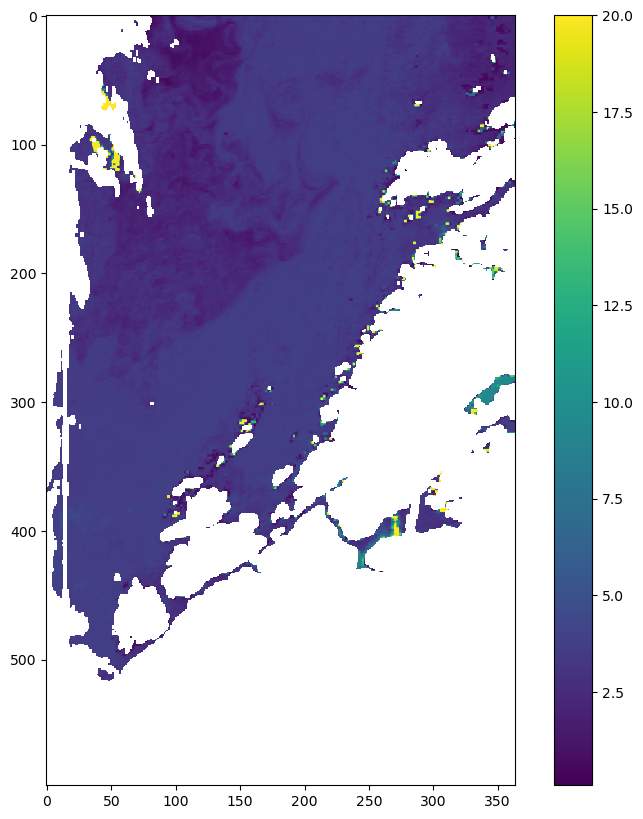

In [135]:
plt.figure(figsize=(10,10))
plt.imshow(chl_result_masked[:,::3], vmax=20)
plt.colorbar()
plt.savefig(l1a_file_prefix + '_S3_OLCI.png')

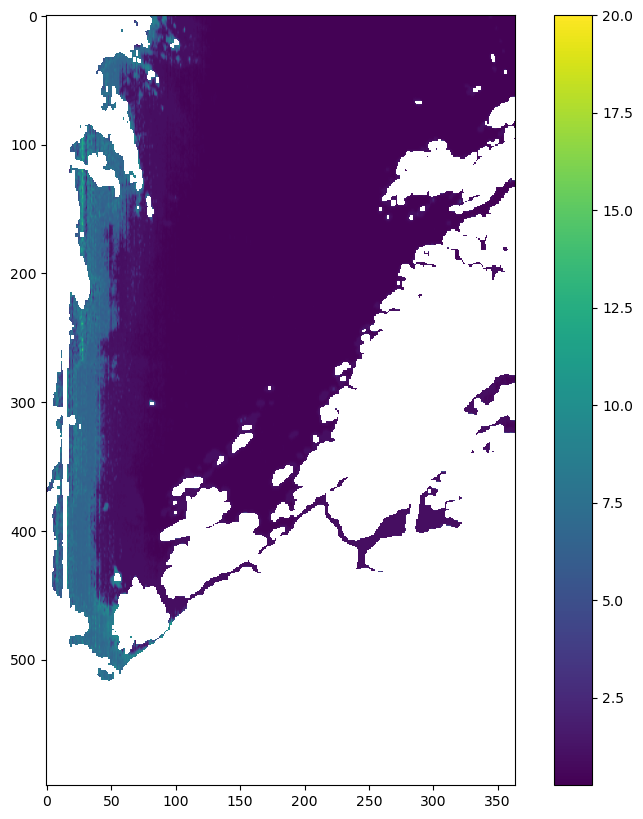

In [142]:
plt.figure(figsize=(10,10))
plt.imshow(satobj.chl[:,::3], vmax=20)
plt.colorbar()
plt.savefig(l1a_file_prefix + '_model_6sv1_aqua_tuned.png')

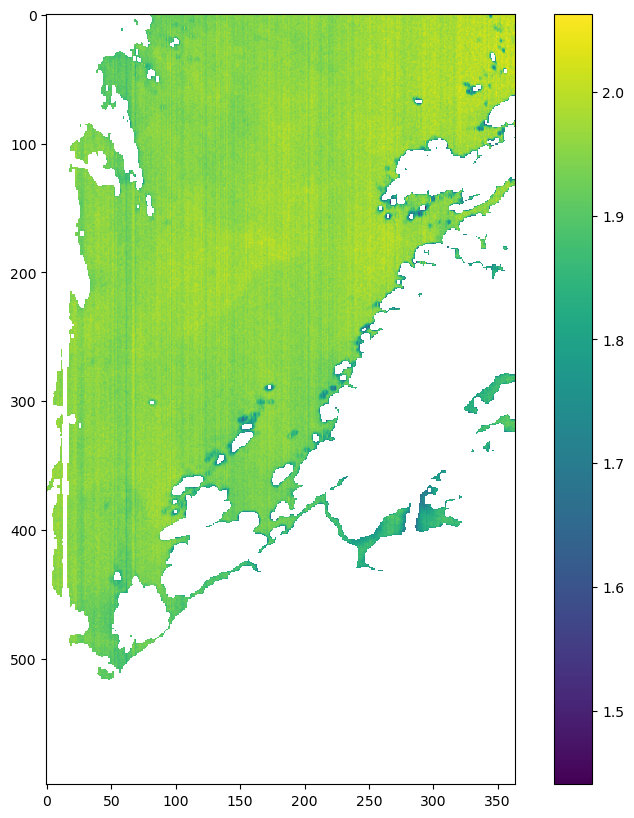

In [137]:
plt.figure(figsize=(10,10))
plt.imshow(chlor[:,::3])
plt.colorbar()
plt.savefig(l1a_file_prefix + '_band_ratio.png')

In [144]:
from joblib import dump, load

model_path = "/home/cameron/Dokumenter/Chlorophyll_NN_Models/model_6sv1_aqua_tuned.joblib"


In [145]:
model = load(model_path)

In [146]:
type(model)

sklearn.ensemble._voting.VotingRegressor

In [147]:
model.estimators_

[KNeighborsRegressor(),
 DecisionTreeRegressor(),
 HistGradientBoostingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)]